# 1.Chuẩn bị dữ liệu

## 1.1 Tải dữ liệu

In [ ]:
import pandas as pd

In [ ]:
file_name ='data_10y.csv'
data = pd.read_csv(file_name, header=[0, 1], index_col=0, parse_dates=True)

In [ ]:
print(data)

Price              Close                                            \
Ticker            ACB.VN        BID.VN        CTG.VN        FPT.VN   
Date                                                                 
2015-10-01   3166.126709  13552.242188  13480.748047  10588.070312   
2015-10-02   3182.446777  13379.234375  13411.968750  10588.070312   
2015-10-05   3198.767334  13609.911133  13755.865234  10683.030273   
2015-10-06   3296.688721  14186.602539  13962.203125  10920.430664   
2015-10-07   3247.728027  13840.588867  13755.865234  10730.510742   
...                  ...           ...           ...           ...   
2025-09-25  25650.000000  40450.000000  49895.804688  98000.000000   
2025-09-26  25650.000000  40103.851562  50292.589844  97500.000000   
2025-09-29  25600.000000  39856.601562  50590.179688  95500.000000   
2025-09-30  25500.000000  39559.902344  50391.785156  93000.000000   
2025-10-01  25800.000000  39609.351562  51086.160156  93400.000000   

Price              

# 2.Tiền xử lý và phân tích dữ liệu

##2.1 Xử lý dữ liệu thiếu

In [ ]:
df_close = data['Close']

In [ ]:
print(df_close.isna().sum())
print(df_close.info())

Ticker
ACB.VN    5
BID.VN    0
CTG.VN    4
FPT.VN    0
GAS.VN    0
HPG.VN    0
MBB.VN    0
NKG.VN    0
REE.VN    0
VCB.VN    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2015-10-01 to 2025-10-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACB.VN  2493 non-null   float64
 1   BID.VN  2498 non-null   float64
 2   CTG.VN  2494 non-null   float64
 3   FPT.VN  2498 non-null   float64
 4   GAS.VN  2498 non-null   float64
 5   HPG.VN  2498 non-null   float64
 6   MBB.VN  2498 non-null   float64
 7   NKG.VN  2498 non-null   float64
 8   REE.VN  2498 non-null   float64
 9   VCB.VN  2498 non-null   float64
dtypes: float64(10)
memory usage: 214.7 KB
None


In [ ]:
df_close[df_close.isna().any(axis=1)]

Ticker,ACB.VN,BID.VN,CTG.VN,FPT.VN,GAS.VN,HPG.VN,MBB.VN,NKG.VN,REE.VN,VCB.VN
Date,,,,,,,,,,
2020-12-02,NaN,23932.683594,23213.021484,25394.564453,57046.460938,15237.848633,7213.179199,6857.638672,26037.542969,41201.339844
2020-12-03,NaN,23990.351562,23247.412109,25394.564453,57386.023438,15906.932617,7094.930664,7146.990723,25444.554688,41201.339844
2020-12-04,NaN,24019.187500,23866.425781,25440.238281,58065.144531,15950.099609,7078.037598,7552.083496,25336.738281,40143.765625
2020-12-07,NaN,24797.718750,23866.425781,25440.238281,58608.441406,16489.683594,7061.145020,8072.916504,25282.832031,41025.078125
2020-12-08,NaN,24624.712891,23728.867188,25668.607422,58472.621094,16576.015625,7213.179199,8188.657227,25067.199219,41025.078125
2024-01-18,17654.455078,38824.285156,NaN,70370.726562,64188.617188,20946.968750,13658.450195,21000.000000,39710.351562,60494.882812
2024-08-27,20303.921875,40540.726562,NaN,113184.289062,71178.609375,21458.333984,15877.324219,18166.666016,58720.109375,60760.503906
2024-10-30,20843.701172,38987.757812,NaN,116088.640625,66391.875000,22500.000000,16267.750977,17208.333984,55638.585938,60893.316406
2024-11-05,20553.048828,38742.550781,NaN,113269.718750,65451.476562,22083.333984,15909.859375,17416.666016,54440.218750,61490.960938


In [ ]:
df_close = df_close.fillna(method='ffill') #fill bằng ngày hôm trước
print(df_close.isna().sum())

Ticker
ACB.VN    0
BID.VN    0
CTG.VN    0
FPT.VN    0
GAS.VN    0
HPG.VN    0
MBB.VN    0
NKG.VN    0
REE.VN    0
VCB.VN    0
dtype: int64


/tmp/ipython-input-1453029756.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close = df_close.fillna(method='ffill') #fill bằng ngày hôm trước


#3.Chiến lược giao dịch

##3.1 Giao dịch cặp (Pair Trading)

###3.1.1 Tìm cặp cổ phiếu

### 3.1.2 Kiểm định đồng liên kết

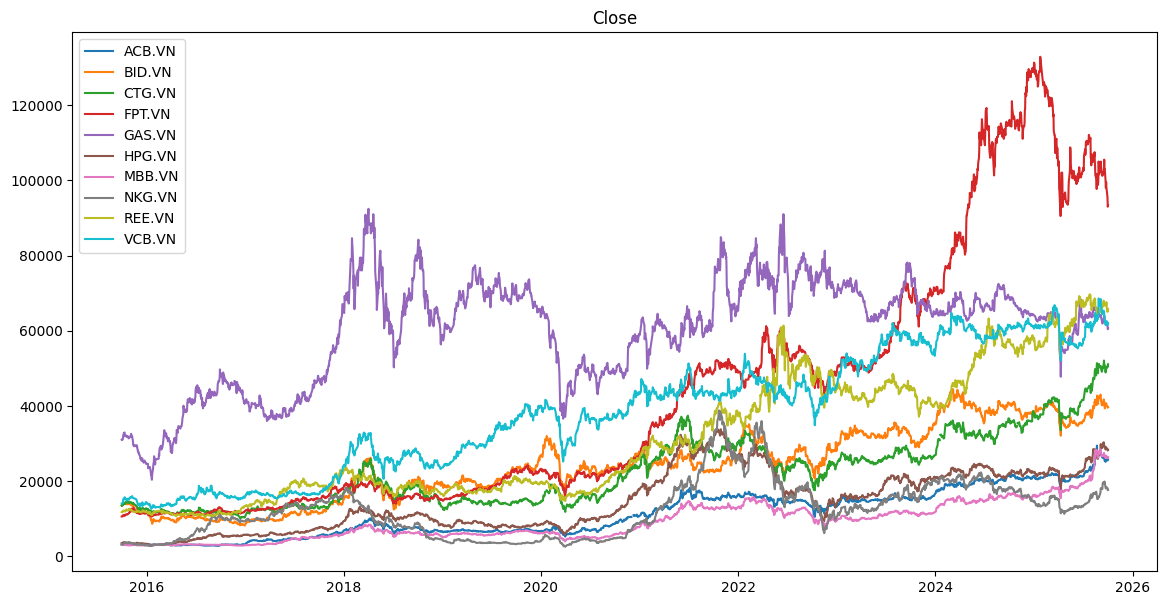

In [ ]:
import matplotlib.pyplot as plt
df = data['Close']

plt.figure(figsize=(14, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Close")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []

    print("Đang chạy kiểm định Engle-Granger...")
    for i in range(n):
        for j in range(i+1, n): # Tránh lặp lại và tự so sánh
            s1 = data[keys[i]]
            s2 = data[keys[j]]

            # Kiểm định coint từ statsmodels
            # Hàm này thực hiện cả hồi quy và kiểm định ADF trên phần dư
            result = coint(s1, s2)
            score = result[0]
            pvalue = result[1]

            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue

            if pvalue < 0.05:
                pairs.append((keys[i], keys[j], pvalue))
                print(f"Cặp đồng liên kết tìm thấy: {keys[i]} - {keys[j]} (p-value: {pvalue:.4f})")

    return score_matrix, pvalue_matrix, pairs

In [ ]:
split_point = int(len(df) * 0.8)
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

Đang chạy kiểm định Engle-Granger...
Cặp đồng liên kết tìm thấy: ACB.VN - BID.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - CTG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - FPT.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - GAS.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - HPG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - MBB.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - NKG.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - REE.VN (p-value: 0.0000)
Cặp đồng liên kết tìm thấy: ACB.VN - VCB.VN (p-value: 0.0000)


/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  result = coint(s1, s2)
/tmp/ipython-input-2386496492.py:18: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reli

Cặp đồng liên kết tìm thấy: BID.VN - VCB.VN (p-value: 0.0034)
Cặp đồng liên kết tìm thấy: CTG.VN - HPG.VN (p-value: 0.0088)
Cặp đồng liên kết tìm thấy: CTG.VN - MBB.VN (p-value: 0.0488)


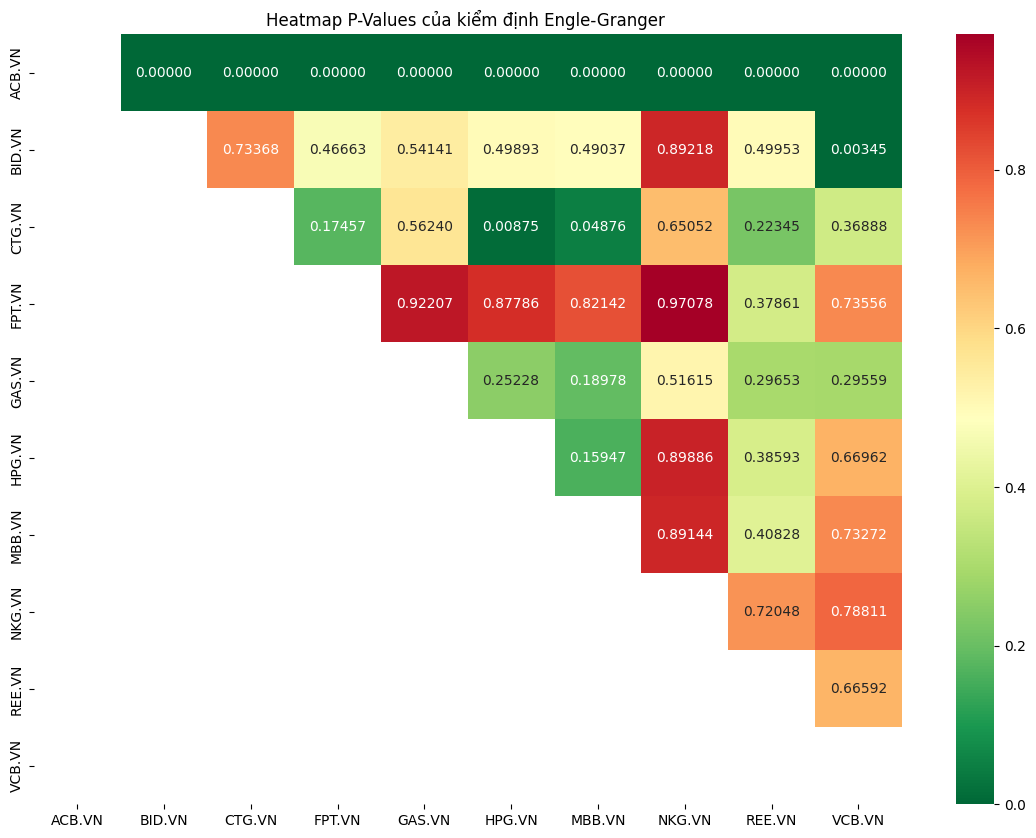

In [ ]:
import numpy as np
# Chạy trên dữ liệu Log Prices
df_kd = df_train.copy()
df_kd = np.log(df_kd)
scores, pvalues, cointegrated_pairs = find_cointegrated_pairs(df_kd)

# Vẽ Heatmap P-values để dễ quan sát
plt.figure(figsize=(14, 10))
sns.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns,
            cmap='RdYlGn_r', mask=(pvalues >= 0.99), annot=True, fmt=".5f")
plt.title("Heatmap P-Values của kiểm định Engle-Granger ")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np

def calc_half_life(spread):
    """Tính half-life theo OU process"""
    spread_lag = spread.shift(1).dropna()
    spread_ret = spread.diff().dropna()

    model = sm.OLS(spread_ret, sm.add_constant(spread_lag)).fit()
    beta = model.params.iloc[1]

    if beta >= 0:   # tránh log dương hoặc zero gây lỗi
        return np.inf

    halflife = -np.log(2) / beta
    return halflife


def hurst_exponent(ts):
    """Tính Hurst exponent"""
    lags = range(2, 100)
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    hurst = poly[0] * 2.0
    return hurst


# ============================================================
# KIỂM ĐỊNH TOÀN BỘ CÁC CẶP
# ============================================================

for s1, s2, p in cointegrated_pairs:
    print(f"\n=== Kiểm định cho spread {s1} - {s2} ===")

    y = df[s1]
    x = df[s2]

    # Loại bỏ NaN
    valid_idx = y.notna() & x.notna()
    y = y[valid_idx]
    x = x[valid_idx]

    # OLS để lấy residual (spread)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    resid = model.resid

    # ---- ADF TEST ----
    adf_stat, adf_pvalue, _, _, crit, _ = adfuller(resid)
    if adf_pvalue <= 0.05:
      print(f"ADF Statistic : {adf_stat:.4f}")
      print(f"ADF p-value   : {adf_pvalue:.4f}")
      print(f"Critical Values: {crit}")

      # ---- HALF-LIFE ----
      hl = calc_half_life(resid)
      print(f"Half-life     : {hl:.2f}")

      # ---- HURST EXPONENT ----
      hurst = hurst_exponent(resid.values)
      print(f"Hurst Exponent: {hurst:.4f}")
    else:
      print(f'Thất bại')


=== Kiểm định cho spread ACB.VN - BID.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - CTG.VN ===
ADF Statistic : -3.2322
ADF p-value   : 0.0182
Critical Values: {'1%': np.float64(-3.4330077865854363), '5%': np.float64(-2.8627141882428515), '10%': np.float64(-2.5673950671859886)}
Half-life     : 56.88
Hurst Exponent: 0.4026

=== Kiểm định cho spread ACB.VN - FPT.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - GAS.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - HPG.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - MBB.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - NKG.VN ===
Thất bại

=== Kiểm định cho spread ACB.VN - REE.VN ===
ADF Statistic : -3.2700
ADF p-value   : 0.0163
Critical Values: {'1%': np.float64(-3.433005627914427), '5%': np.float64(-2.862713234984453), '10%': np.float64(-2.567394559656695)}
Half-life     : 78.79
Hurst Exponent: 0.4593

=== Kiểm định cho spread ACB.VN - VCB.VN ===
Thất bại

=== Kiểm định cho spread BID.VN - VCB.VN ===
ADF Statistic : -4.6613


###3.1.3 Chọn cặp

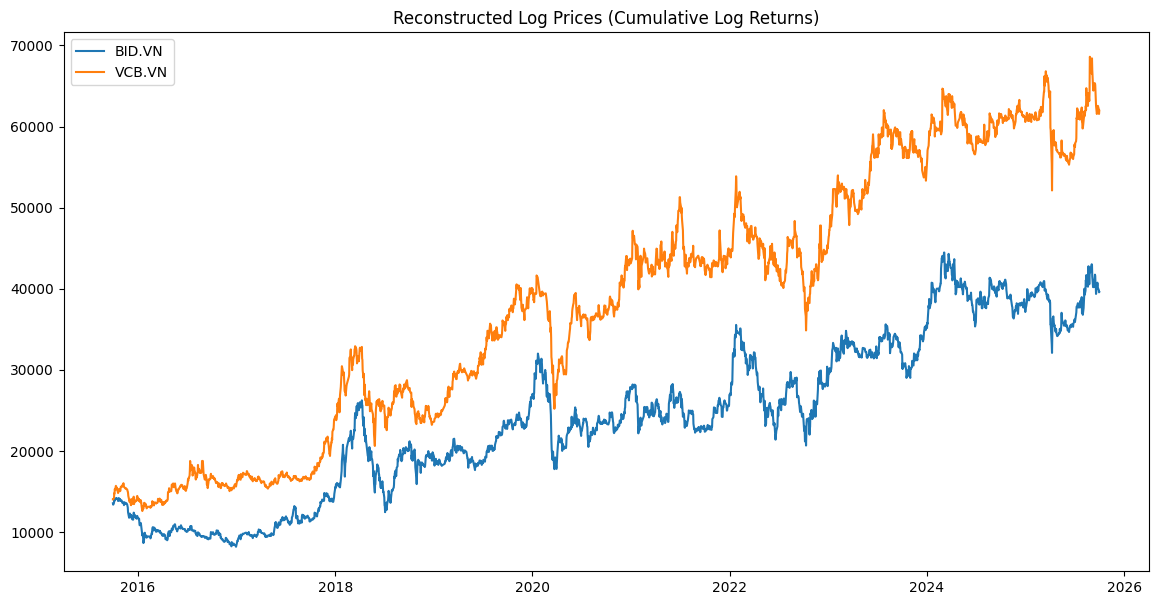

In [ ]:
# Vẽ biểu đồ để hình dung xu hướng giá tích lũy: chọn cặp BID và VCB, lý do cùng nhóm cluster, kiểm định engle,adf và cùng nhóm ngành liên quan đến năng lượng
plt.figure(figsize=(14, 7))

plt.plot(df_close.index, df_close['BID.VN'], label='BID.VN')
plt.plot(df_close.index, df_close['VCB.VN'], label='VCB.VN')
plt.title("Reconstructed Log Prices (Cumulative Log Returns)")
plt.legend()
plt.show()

###3.1.4 Tính toán tham số mô hình

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cài đặt ban đầu
WINDOW = 60  # rolling window
col1, col2 = 'BID.VN','VCB.VN'

df = pd.DataFrame({
    col1: data['Close'][col1],
    col2: data['Close'][col2]
})


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def pair_trading_signals(df, col1, col2, window=30, entry_z=1.0, exit_z=0.0):
    """
    df: DataFrame có 2 cổ phiếu col1 và col2
    window: rolling window để tính beta/mu
    entry_z: |z| vượt mức này sẽ mở vị thế
    exit_z: |z| nhỏ hơn mức này sẽ đóng vị thế
    atr_window: window để tính ATR của spread
    """
    df = df.copy()

    # --- Log price series ---
    log1 = np.log(df[col1])
    log2 = np.log(df[col2])

    betas = [np.nan]*len(df)
    mus = [np.nan]*len(df)

    # --- Rolling OLS ---
    for i in range(window, len(df)):
        y = log1.iloc[i-window:i]
        x = log2.iloc[i-window:i]

        if y.isna().any() or x.isna().any():
            continue

        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()

        mus[i] = model.params.iloc[0]   # intercept
        betas[i] = model.params.iloc[1] # slope

    # --- Gán beta/mu về df ---
    df['beta'] = pd.Series(betas, index=df.index)
    df['mu'] = pd.Series(mus, index=df.index)

    # --- Tính spread ---
    df['spread'] = log1 - df['beta'] * log2 - df['mu']

    # --- Tính z-score ---
    df['spread_mean'] = df['spread'].rolling(window).mean()
    df['spread_std'] = df['spread'].rolling(window).std()
    df['zscore'] = (df['spread'] - df['spread_mean']) / df['spread_std']

    # --- Tạo signal ---
    df['signal'] = 0
    df.loc[df['zscore'] > entry_z, 'signal'] = -1   # short spread: bán col1, mua col2
    df.loc[df['zscore'] < -entry_z, 'signal'] = 1   # long spread: mua col1, bán col2

    # Optional: thoát vị thế khi |z| < exit_z
    df.loc[df['zscore'].abs() < exit_z, 'signal'] = 0

    return df


In [ ]:
df = pair_trading_signals(df, col1, col2, window=WINDOW)
df

,BID.VN,VCB.VN,beta,mu,spread,spread_mean,spread_std,zscore,signal
Date,,,,,,,,,
2015-10-01,13552.242188,14035.710938,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-02,13379.234375,14035.710938,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-05,13609.911133,14198.916992,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-06,14186.602539,14786.458008,NaN,NaN,NaN,NaN,NaN,NaN,0
2015-10-07,13840.588867,14753.816406,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2025-09-25,40450.000000,62543.476562,1.026085,-0.749854,0.025982,0.011159,0.020927,0.708308,0
2025-09-26,40103.851562,62543.476562,1.022762,-0.712648,0.016888,0.011259,0.020940,0.268807,0
2025-09-29,39856.601562,62146.375000,1.016346,-0.641395,0.016772,0.011408,0.020947,0.256064,0


In [ ]:
import pandas as pd
import numpy as np

def backtest_pair_safe_fixed_shift(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    beta_col="beta",
    zscore_col="zscore",
    entry_z=1.0,
    exit_z=0.0,
    max_risk_per_trade=0.02,   # % cho phép trade
    initial_cash=100_000_000,
    buy_fee=0.001,             # 0.1% mua
    sell_fee=0.002,            # 0.1% bán + 0.1% thuế
    allow_short=False,
    stop_loss_pct=0.05         # 95% max equity
):
    df = df.copy()

    # --- SHIFT beta và zscore để tránh look-ahead ---
    df[beta_col] = df[beta_col].shift(1)
    df[zscore_col] = df[zscore_col].shift(1)

    cash = initial_cash
    pos1 = 0
    pos2 = 0
    prev_equity = initial_cash

    # initialize columns
    '''
    hold1,hold2 : cổ phần đang nắm của cổ 1, cổ 2
    cash  : tiền mặt đang giữ
    equity  : tổng tài sản
    daily_pnl  : lợi nhuận hôm nay
    trades  : số lần giao dịch
    '''
    df["hold1"] = 0
    df["hold2"] = 0
    df["cash"] = 0.0
    df["equity"] = 0.0
    df["daily_pnl"] = 0.0
    df["trades"] = 0
    max_equity = initial_cash  # theo dõi đỉnh equity
    total_trades = 0

    for i in range(len(df)):
        price1 = float(df.iloc[i][col1])
        price2 = float(df.iloc[i][col2])
        beta = df.iloc[i][beta_col]
        z = df.iloc[i][zscore_col]

        # bỏ qua khi mà chưa quan sát đủ mẫu (rolling window chưa đủ)
        if pd.isna(beta) or pd.isna(z):
            df.iloc[i, df.columns.get_loc("hold1")] = pos1
            df.iloc[i, df.columns.get_loc("hold2")] = pos2
            df.iloc[i, df.columns.get_loc("cash")] = cash
            df.iloc[i, df.columns.get_loc("equity")] = cash + pos1 * price1 + pos2 * price2
            df.iloc[i, df.columns.get_loc("daily_pnl")] = 0.0
            df.iloc[i, df.columns.get_loc("trades")] = 0
            continue
        #tổng tài sản
        nav = cash + pos1*price1 + pos2*price2
        trades_today = 0


        # Step 1: tính qty per leg dựa trên hedge ratio
        max_leg_value = nav * max_risk_per_trade
        qty1 = int(max_leg_value / (price1 + abs(beta)*price2))
        qty2 = int(qty1 * abs(beta))



        # Step 2: ENTRY
        if z > entry_z:
            '''
            spread quá cao dự đoán nó sẽ quay về mean (col đạt đỉnh rồi giảm, col2 đạt đáy rồi tăng)
            short spread: bán col1, mua col2
            số lượng bán stock1 = giá trị nhỏ nhất
            '''

            '''sell_qty1 = min(qty1, pos1 + qty1 if allow_short else pos1)
            buy_qty2 = qty2'''
            if allow_short:
                sell_qty1 = qty1
            else:
                # không được nợ
                sell_qty1 = min(qty1, pos1)


            buy_qty2 = qty2
            # số tiền cần cho giao dịch
            net_cash_needed = buy_qty2*price2*(1+buy_fee) - sell_qty1*price1*(1-sell_fee)
            if net_cash_needed > cash:
                '''
                nếu mà không đủ tiền mặt để giao dịch
                tính hệ số scale xuống
                '''
                factor = cash / net_cash_needed if net_cash_needed>0 else 0
                buy_qty2 = max(0, int(buy_qty2*factor))
                sell_qty1 = max(0, int(sell_qty1*factor))

            if allow_short or pos1 >= sell_qty1:
                '''
                allow_short: True là cho nợ cổ phiếu
                bán khi cho nợ hoặc có đủ cổ phiếu 1
                '''
                cash += sell_qty1*price1*(1-sell_fee)
                pos1 -= sell_qty1
                cash -= buy_qty2*price2*(1+buy_fee)
                pos2 += buy_qty2
                trades_today += 1

        elif z < -entry_z:
            '''
            Spread quá thấp
            Dự đoán nó sẽ quay về mean (col1 đạt đáy rồi tăng, col2 đạt đỉnh rồi giảm)
            long spread: mua col1, bán col2
            '''
            buy_qty1 = qty1
            '''sell_qty2 = min(qty2, pos2 + qty2 if allow_short else pos2)'''
            if allow_short:
                sell_qty2 = qty2
            else:
                sell_qty2 = min(qty2, pos2)

            net_cash_needed = buy_qty1*price1*(1+buy_fee) - sell_qty2*price2*(1-sell_fee)
            if net_cash_needed > cash:
                factor = cash / net_cash_needed if net_cash_needed>0 else 0
                buy_qty1 = max(0, int(buy_qty1*factor))
                sell_qty2 = max(0, int(sell_qty2*factor))

            if allow_short or pos2 >= sell_qty2:
                cash -= buy_qty1*price1*(1+buy_fee)
                pos1 += buy_qty1
                cash += sell_qty2*price2*(1-sell_fee)
                pos2 -= sell_qty2
                trades_today += 1

        # Step 3: EXIT
        if abs(z) < exit_z:
            '''
            spread quay về gần bằng mean thì thoát lệnh
            '''
            if pos1 != 0:
                close_qty1 = min(abs(pos1), qty1)
                '''close_qty2 = int(close_qty1 * abs(beta))'''
                close_qty2 = min(abs(pos2), int(close_qty1 * abs(beta)))
                if pos1 > 0:
                    '''
                    Nếu đang long stock 1
                    Bán ra stock 1 → nhận tiền → cash tăng
                    Giảm số lượng stock 1 theo số đóng
                    '''
                    cash += close_qty1*price1*(1-sell_fee)
                    pos1 -= close_qty1
                else:
                    '''
                    Nếu đang short stock 1
                    Mua vào stock 1 → trả tiền → cash giảm
                    Tăng số lượng stock 1 theo số đóng
                    '''
                    cash -= close_qty1*price1*(1+buy_fee)
                    pos1 += close_qty1

                if pos2 > 0:
                    '''
                    Nếu đang long stock 2
                    Bán ra stock 2 → nhận tiền → cash tăng
                    Giảm số lượng stock 1 theo số đóng
                    '''
                    cash += close_qty2*price2*(1-sell_fee)
                    pos2 -= close_qty2
                else:
                    '''
                    Nếu đang short stock 2
                    Mua vào stock 2 → trả tiền → cash giảm
                    Tăng số lượng stock 2 theo số đóng
                    '''
                    cash -= close_qty2*price2*(1+buy_fee)
                    pos2 += close_qty2

                trades_today += 1

        # Step 4: mark-to-market
        equity = cash + pos1*price1 + pos2*price2
        daily_pnl = equity - prev_equity
        prev_equity = equity

        df.iloc[i, df.columns.get_loc("hold1")] = pos1
        df.iloc[i, df.columns.get_loc("hold2")] = pos2
        df.iloc[i, df.columns.get_loc("cash")] = cash
        df.iloc[i, df.columns.get_loc("equity")] = equity
        df.iloc[i, df.columns.get_loc("daily_pnl")] = daily_pnl
        df.iloc[i, df.columns.get_loc("trades")] = trades_today

        total_trades += trades_today

    print(f"Total trades executed: {total_trades}")
    print(f"Final equity: {prev_equity:,.0f} VND")
    print(f"Net P/L: {prev_equity - initial_cash:,.0f} VND")

    return df


In [ ]:
df_bt = backtest_pair_safe_fixed_shift(
    df,
    col1="BID.VN",
    col2="VCB.VN",
    beta_col="beta",
    zscore_col="zscore",
    entry_z=1,
    exit_z=0.0,
    max_risk_per_trade=0.01,  # 1% NAV mỗi bước
    initial_cash=100_000_000,
    allow_short=False
)

# Xem kết quả cuối
df_bt[['hold1','hold2','cash','equity','daily_pnl','trades']].tail(10)


Total trades executed: 1087
Final equity: 182,895,266 VND
Net P/L: 82,895,266 VND


,hold1,hold2,cash,equity,daily_pnl,trades
Date,,,,,,
2025-09-18,795,576,1.156959e+08,1.843147e+08,-6.718941e+05,0
2025-09-19,795,576,1.156959e+08,1.830138e+08,-1.300897e+06,0
2025-09-22,795,576,1.156959e+08,1.833855e+08,3.716795e+05,0
2025-09-23,778,593,1.153306e+08,1.833795e+08,-5.997599e+03,1
2025-09-24,761,610,1.149626e+08,1.839407e+08,5.612103e+05,1
2025-09-25,744,627,1.145846e+08,1.838942e+08,-4.655387e+04,1
2025-09-26,744,627,1.145846e+08,1.836366e+08,-2.575344e+05,0
2025-09-29,744,627,1.145846e+08,1.832037e+08,-4.329367e+05,0
2025-09-30,744,627,1.145846e+08,1.826095e+08,-5.942158e+05,0


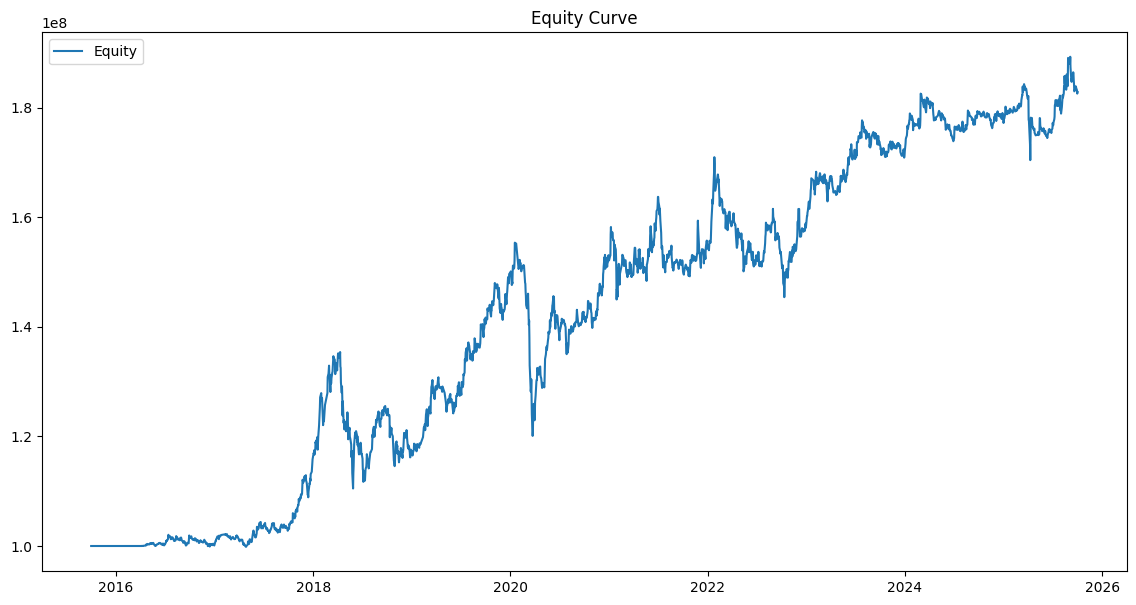

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_bt.index, df_bt['equity'], label='Equity')

plt.title("Equity Curve")
plt.legend()
plt.show()

###3.1.5 Tối ưu tham số

In [ ]:
!pip install bayesian-optimization

In [ ]:
def make_objective_pnl(df, col1, col2,
                       initial_cash=100_000_000,
                       max_risk_per_trade=0.02,
                       buy_fee=0.001, sell_fee=0.002,
                       allow_short=False):

    def _objective(window, entry_z, exit_z):
        # ép về dạng hợp lệ
        window_i = int(round(window))
        window_i = max(window_i, 5)  # tránh window quá nhỏ

        entry_z_f = float(entry_z)
        exit_z_f  = float(exit_z)

        # Tạo tín hiệu
        df_sig = pair_trading_signals(
            df,
            col1=col1,
            col2=col2,
            window=window_i,
            entry_z=entry_z_f,
            exit_z=exit_z_f
        )

        # Backtest
        res = backtest_pair_safe_fixed_shift(
            df_sig,
            col1=col1,
            col2=col2,
            beta_col="beta",
            zscore_col="zscore",
            entry_z=entry_z_f,
            exit_z=exit_z_f,
            max_risk_per_trade=max_risk_per_trade,
            initial_cash=initial_cash,
            buy_fee=buy_fee,
            sell_fee=sell_fee,
            allow_short=allow_short
        )

        final_equity = float(res["equity"].iloc[-1])
        pnl = final_equity - initial_cash

        # Debug log
        print(f"[PNL] win={window_i}, entry={entry_z_f:.3f}, exit={exit_z_f:.3f} -> pnl={pnl:,.0f}")

        return pnl

    return _objective


In [ ]:
from bayes_opt import BayesianOptimization

def optimize_pnl(df, col1, col2):
    # tạo objective
    obj = make_objective_pnl(df, col1, col2)

    # phạm vi tham số
    pbounds = {
        "window": (5, 60),
        "entry_z": (0.5, 3.5),
        "exit_z": (0.2, 0.5) # không được chỉnh về 0
    }

    optimizer = BayesianOptimization(
        f=obj,
        pbounds=pbounds,
        verbose=2,
        random_state=42
    )

    optimizer.maximize(init_points=10, n_iter=50)

    return optimizer


In [ ]:
opt = optimize_pnl(df, "BID.VN", "VCB.VN")
print(opt.max)


|   iter    |  target   |  window   |  entry_z  |  exit_z   |
-------------------------------------------------------------
Total trades executed: 19
Final equity: 103,324,349 VND
Net P/L: 3,324,349 VND
[PNL] win=26, entry=3.352, exit=0.420 -> pnl=3,324,349
| 1         | 3324349.2 | 25.599706 | 3.3521429 | 0.4195981 |
Total trades executed: 1306
Final equity: 116,508,849 VND
Net P/L: 16,508,849 VND
[PNL] win=38, entry=0.968, exit=0.247 -> pnl=16,508,849
| 2         | 1.650e+07 | 37.926216 | 0.9680559 | 0.2467983 |
Total trades executed: 0
Final equity: 100,000,000 VND
Net P/L: 0 VND
[PNL] win=8, entry=3.099, exit=0.380 -> pnl=0
| 3         | 0.0       | 8.1945986 | 3.0985284 | 0.3803345 |
Total trades executed: 2064
Final equity: 121,862,042 VND
Net P/L: 21,862,042 VND
[PNL] win=44, entry=0.562, exit=0.491 -> pnl=21,862,042
| 4         | 2.186e+07 | 43.943991 | 0.5617534 | 0.4909729 |
Total trades executed: 1094
Final equity: 128,330,355 VND
Net P/L: 28,330,355 VND
[PNL] win=51, entry=

### 3.1.6 Backtest (train/test)

In [ ]:
split_point = int(len(df) * 0.8) #df phải tính chỉ số r
df_train = df.iloc[:split_point]
df_test = df.iloc[split_point:]

In [ ]:
opt = optimize_pnl(df_train, "BID.VN", "VCB.VN")

|   iter    |  target   |  window   |  entry_z  |  exit_z   |
-------------------------------------------------------------
Total trades executed: 8
Final equity: 103,407,073 VND
Net P/L: 3,407,073 VND
[PNL] win=26, entry=3.352, exit=0.420 -> pnl=3,407,073
| 1         | 3407072.5 | 25.599706 | 3.3521429 | 0.4195981 |
Total trades executed: 1049
Final equity: 113,183,878 VND
Net P/L: 13,183,878 VND
[PNL] win=38, entry=0.968, exit=0.247 -> pnl=13,183,878
| 2         | 1.318e+07 | 37.926216 | 0.9680559 | 0.2467983 |
Total trades executed: 0
Final equity: 100,000,000 VND
Net P/L: 0 VND
[PNL] win=8, entry=3.099, exit=0.380 -> pnl=0
| 3         | 0.0       | 8.1945986 | 3.0985284 | 0.3803345 |
Total trades executed: 1642
Final equity: 120,004,194 VND
Net P/L: 20,004,194 VND
[PNL] win=44, entry=0.562, exit=0.491 -> pnl=20,004,194
| 4         | 2.000e+07 | 43.943991 | 0.5617534 | 0.4909729 |
Total trades executed: 863
Final equity: 121,219,500 VND
Net P/L: 21,219,500 VND
[PNL] win=51, entry=1.

In [ ]:
len(df_test)

500

In [ ]:
entry_z = opt.max['params']['entry_z']
exit_z  = opt.max['params']['exit_z']
window  = opt.max['params']['window']
df_bt = backtest_pair_safe_fixed_shift(
    df_test,
    col1  = "BID.VN",
    col2  = "VCB.VN",
    beta_col    = "beta",
    zscore_col  = "zscore",
    entry_z = entry_z,
    exit_z  = exit_z,
    max_risk_per_trade  = 0.01,  # 1% NAV mỗi bước
    initial_cash  = 100_000_000,
    allow_short = False)

Total trades executed: 414
Final equity: 104,516,510 VND
Net P/L: 4,516,510 VND


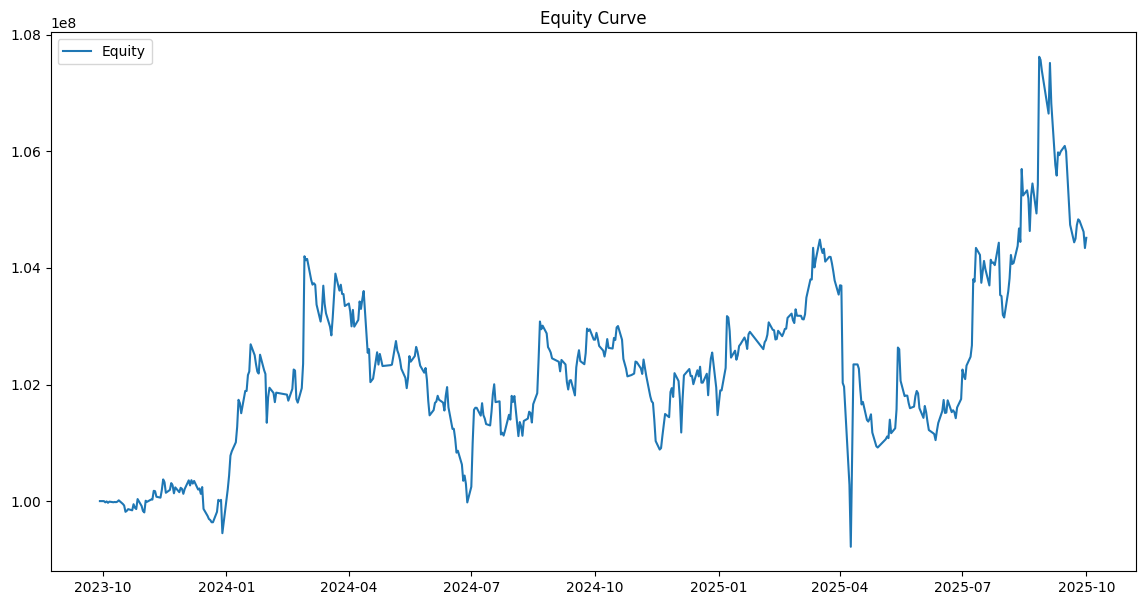

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_bt.index, df_bt['equity'], label='Equity')

plt.title("Equity Curve")
plt.legend()